# Lab 4 - Part B: Building models to optimise a function
The goal of this part of the practical is to implement steepest descent and Newton's method on a two-dimensional function.

This code finds the optimum of Rosenbrock's function - the definition is in the class `Rosenbrock` in [functions.py](functions.py) - look it up on the web! In order to make this work you will need to calculate the first and second derivatives of the function by hand, and then implement them in the `Rosenbrock` class. 

In [3]:
'''
Rosenbrock函数，也称为Rosenbrock's valley或者Rosenbrock's banana function，是数学优化中常用的一个非凸优化问题。这个函数由Howard H. Rosenbrock在1960年引入，用来测试优化算法的性能。
Rosenbrock函数的特点是一个狭长的山谷，目标是找到山谷底部的最小值。然而，这个函数的狭长形状使得大多数优化算法在梯度下降时很容易陷入局部最小值，因此它经常被用作优化算法的挑战性测试问题。
f(x1, x2) = (a - x1)**2 + b * (x2 - x1**2)**2
通常，a=1, b=100, 此时函数f最小值为0，在(a, a^2)处, 即(1, 1)处取得。
'''

"\nRosenbrock函数，也称为Rosenbrock's valley或者Rosenbrock's banana function，是数学优化中常用的一个非凸优化问题。这个函数由Howard H. Rosenbrock在1960年引入，用来测试优化算法的性能。\nRosenbrock函数的特点是一个狭长的山谷，目标是找到山谷底部的最小值。然而，这个函数的狭长形状使得大多数优化算法在梯度下降时很容易陷入局部最小值，因此它经常被用作优化算法的挑战性测试问题。\nf(x1, x2) = (a - x1)**2 + b * (x2 - x1**2)**2\n通常，a=1, b=100, 此时函数f最小值为0，在(a, a^2)处, 即(1, 1)处取得。\n"

### Import modules

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('machinevision.mplstyle')

from functions import rosenbrock
from optimisation import SteepestDescent, NewtonMethod, optimise

# Define model and create data

In [26]:
x1, x2 = np.mgrid[-1.5:1.5:0.01, -1.5:1.5:0.01]
x = np.stack((x2, x1))
w = rosenbrock(x)   # 自动调用__call__函数

# Perform optimisation
Newton's method for optimisation has been implemented for you in [optimisation.py](optimisation.py), as the function named '`optimise`'. Given a start position and tolerance, '`optimise`' can optimize different functions. Each (mathematical) function is passed in as a class definition, which is expected to implement three methods so that '`optimise`' can apply Newton's method: 
1. '`call`' : returns the function value at a given `x` 
2. '`jacobian`' : returns the jacobian for that function at a given `x` 
3. '`hessian`' : returns the hessian for that function at a given `x` 

**TODO:** Here we will be optimizing the Rosenbrock function. You can find a placeholder for this function in [functions.py](functions.py). Complete the '`jacobian'` and '`hesian`' methods, and verify that '`optimise`'  correctly finds the minimum of the Rosenbrock function. You may assume `x` two-dimensional.

In [63]:
start_position = np.array([[-1.2, 1]]).T
x_optimisation, w_optimisation = optimise(start_position, tolerance=1e-5, function=rosenbrock,
                                          optimiser=NewtonMethod)

Iteration    1, Function 4.731547058170665
Iteration    2, Function 4.0455943879995795
Iteration    3, Function 3.159866765481782
Iteration    4, Function 1.9546545285489096
Iteration    5, Function 1.2536699924701045
Iteration    6, Function 0.6661552741594783
Iteration    7, Function 0.32398508900399536
Iteration    8, Function 0.10964145633821344
Iteration    9, Function 0.02050229530826622
Iteration   10, Function 6.284818353143642e-05
Iteration   11, Function 1.7463760819999868e-07
Iteration   12, Function 5.160773460589628e-13


# Visualise results

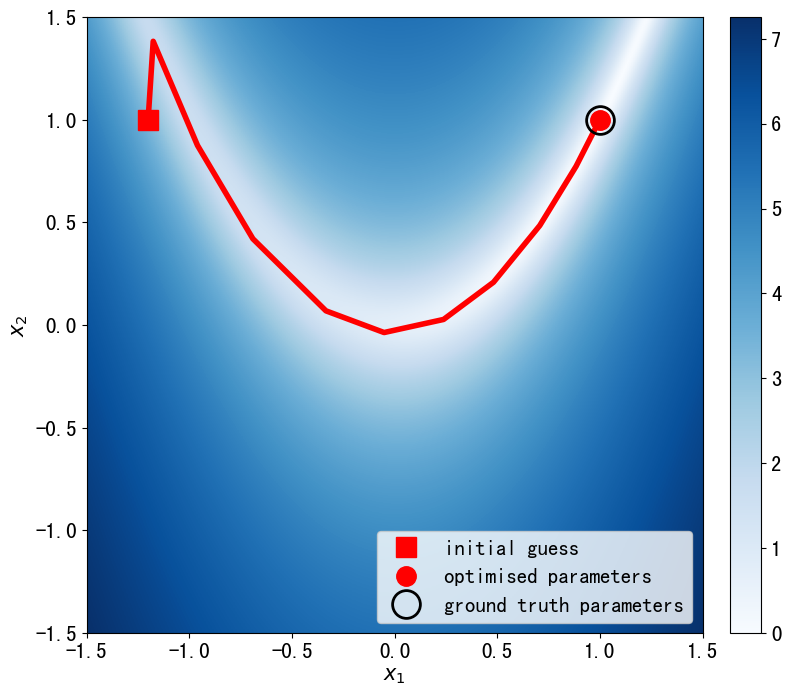

In [49]:
fig, ax = plt.subplots(figsize=(9,8))
ax.set(xlabel='$x_1$', ylabel='$x_2$')

domain = ax.imshow(np.log(w + 1), origin='lower', extent=[-1.5, 1.5, -1.5, 1.5], cmap='Blues')

ax.plot(x_optimisation[:, 0], x_optimisation[:, 1], 'r', linewidth=4)
ax.plot(*x_optimisation[0], 'rs', fillstyle='full', label='initial guess')
ax.plot(*x_optimisation[-1], 'ro', fillstyle='full', label='optimised parameters')
ax.plot(1, 1, 'ko', markeredgewidth=2, markersize=20, label='ground truth parameters')

fig.colorbar(domain, fraction=0.046, pad=0.04)
plt.legend(loc='lower right');

# Things to investigate once you have gotten this to work

If you have correctly implemented the derivatives then the optimised parameters should have converged to approximately the same as the ground truth minimum. Great! Now try the extra tasks outlined below:

1. Change the routine to use steepest descent (Eq B.4 in the book's Appendix, page 603) rather than Newton's method. This has been defined in the same way as Newton's method in [optimisation.py](optimisation.py) - you just need to specify the update rule.
2. Implement the first derivative using finite differences rather than explicitly writing down the derivative. You may want to use the class in [numerical.py](numerical.py) for this.

In [64]:
# use steepest descent
start_position = np.array([[-1.2, 1]]).T
x_optimisation, w_optimisation = optimise(start_position, tolerance=1e-5, function=rosenbrock,
                                          optimiser=SteepestDescent)

Iteration    1, Function 4.128119842236855
Iteration    2, Function 2.8315489161740164
Iteration    3, Function 2.650299432061951
Iteration    4, Function 2.510955234097085
Iteration    5, Function 2.3919720078213276
Iteration    6, Function 2.294711449486873
Iteration    7, Function 2.2049945011439402
Iteration    8, Function 2.128448859651528
Iteration    9, Function 2.055275434277797
Iteration   10, Function 1.9904278256387387
Iteration   11, Function 1.9271783546720358
Iteration   12, Function 1.8694769974881977
Iteration   13, Function 1.8125145776583538
Iteration   14, Function 1.7595008689857574
Iteration   15, Function 1.7066902960475232
Iteration   16, Function 1.6571754534957495
Iteration   17, Function 1.6074257323520085
Iteration   18, Function 1.560486859947699
Iteration   19, Function 1.5129741851401695
Iteration   20, Function 1.4677542538983654
Iteration   21, Function 1.4216043747781404
Iteration   22, Function 1.377295212531404
Iteration   23, Function 1.3316608107442

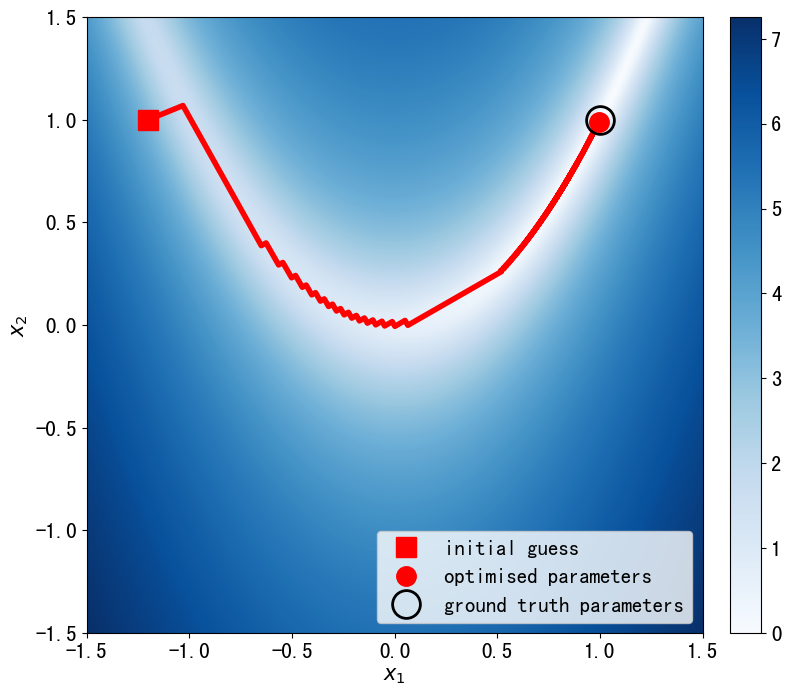

In [21]:
fig, ax = plt.subplots(figsize=(9,8))
ax.set(xlabel='$x_1$', ylabel='$x_2$')

domain = ax.imshow(np.log(w + 1), origin='lower', extent=[-1.5, 1.5, -1.5, 1.5], cmap='Blues')

ax.plot(x_optimisation[:, 0], x_optimisation[:, 1], 'r', linewidth=4)
ax.plot(*x_optimisation[0], 'rs', fillstyle='full', label='initial guess')
ax.plot(*x_optimisation[-1], 'ro', fillstyle='full', label='optimised parameters')
ax.plot(1, 1, 'ko', markeredgewidth=2, markersize=20, label='ground truth parameters')

fig.colorbar(domain, fraction=0.046, pad=0.04)
plt.legend(loc='lower right');

In [109]:
# use finite difference
import functions
from numerical import finite_difference

start_position = np.array([[-1.2, 1]]).T
x_optimisation, w_optimisation = optimise(start_position, tolerance=1e-5, function=finite_difference(functions.Rosenbrock),
                                          optimiser=SteepestDescent)

Iteration    1, Function 4.128339552638412
Iteration    2, Function 4.119388340560535
Iteration    3, Function 4.108166507312863
Iteration    4, Function 4.103224906709695
Iteration    5, Function 4.095889043753336
Iteration    6, Function 4.0913174585969685
Iteration    7, Function 4.082560079561131
Iteration    8, Function 4.075904176395507
Iteration    9, Function 4.054252048052653
Iteration   10, Function 4.03475034790545
Iteration   11, Function 2.904374153092566
Iteration   12, Function 2.705319568309949
Iteration   13, Function 2.6440901882215346
Iteration   14, Function 2.581173385425414
Iteration   15, Function 2.545764927042303
Iteration   16, Function 2.507728171507089
Iteration   17, Function 2.481110395154742
Iteration   18, Function 2.451920439137062
Iteration   19, Function 2.4296478390077105
Iteration   20, Function 2.404787265342463
Iteration   21, Function 2.384568612794735
Iteration   22, Function 2.361601971363112
Iteration   23, Function 2.3419991374558693
Iteratio

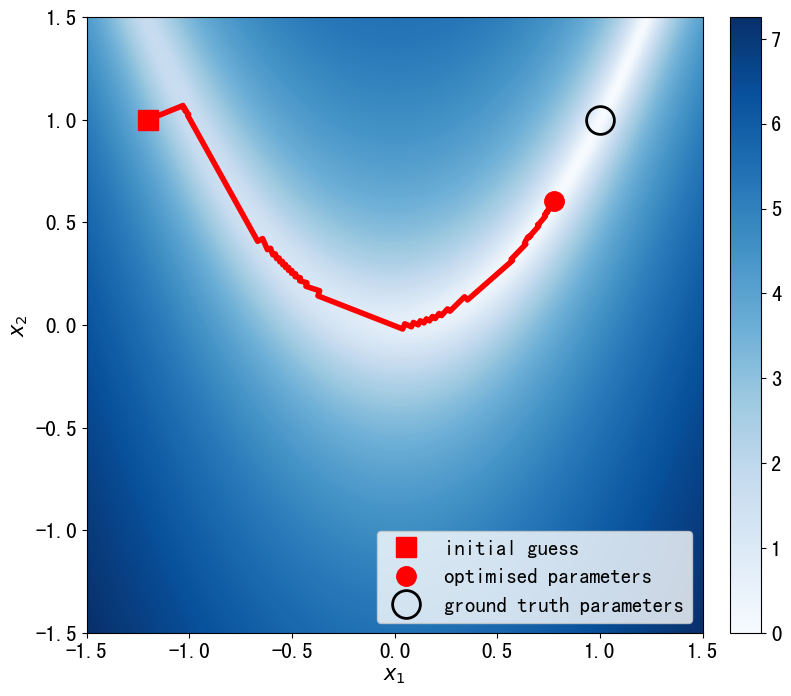

In [110]:
fig, ax = plt.subplots(figsize=(9,8))
ax.set(xlabel='$x_1$', ylabel='$x_2$')

domain = ax.imshow(np.log(w + 1), origin='lower', extent=[-1.5, 1.5, -1.5, 1.5], cmap='Blues')

ax.plot(x_optimisation[:, 0], x_optimisation[:, 1], 'r', linewidth=4)
ax.plot(*x_optimisation[0], 'rs', fillstyle='full', label='initial guess')
ax.plot(*x_optimisation[-1], 'ro', fillstyle='full', label='optimised parameters')
ax.plot(1, 1, 'ko', markeredgewidth=2, markersize=20, label='ground truth parameters')

fig.colorbar(domain, fraction=0.046, pad=0.04)
plt.legend(loc='lower right');

In [111]:
# Fail to converge to optimum. Because h is set too high, therefore derivative is not precise,
# which means we cannot find the correct update direction
# If we set h to 1e-5, it turns out that the function will converge to optimum as expected

In [96]:
rosenbrock = finite_difference(functions.Rosenbrock)
rosenbrock.jacobian(np.array([[1, 2]]).T)

array([[-399.7985999],
       [ 200.1      ]])